In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
train_images, test_images = train_images/255.0, test_images/255.0

In [5]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

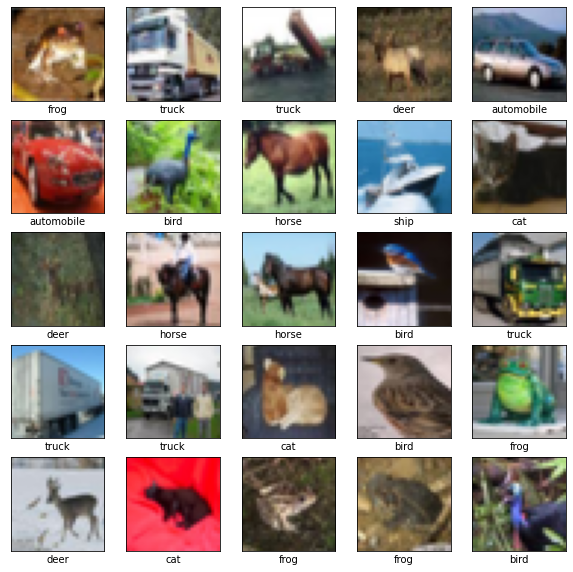

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [7]:
train_images[0].shape

(32, 32, 3)

In [8]:
my_model = models.Sequential()
my_model.add(layers.Conv2D(32, (2,2), activation='relu', input_shape=(32,32,3)))
my_model.add(layers.Conv2D(64, (3,3), activation='relu'))
my_model.add(layers.MaxPool2D((2,2)))
my_model.add(layers.Conv2D(14, (2,3), activation='relu'))
my_model.add(layers.Conv2D(17, (4,4), activation='relu'))
my_model.add(layers.MaxPool2D((2,2)))
my_model.add(layers.Flatten())
my_model.add(layers.Dense(100, activation='relu'))
my_model.add(layers.Dense(10, activation='softmax'))



In [9]:
my_model.compile(optimizer = 'adam', 
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy']
                )

In [11]:
history = my_model.fit(train_images, train_labels, epochs = 10, batch_size=50, validation_data=(test_images, test_labels))

Epoch 1/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.8956 - accuracy: 0.6850 - val_loss: 0.9506 - val_accuracy: 0.6618
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.8499 - accuracy: 0.7008 - val_loss: 0.9485 - val_accuracy: 0.6698
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.8177 - accuracy: 0.7134 - val_loss: 0.9267 - val_accuracy: 0.6747
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.7802 - accuracy: 0.7264 - val_loss: 0.8916 - val_accuracy: 0.6964
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.7509 - accuracy: 0.7362 - val_loss: 0.8668 - val_accuracy: 0.6960
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.7227 - accuracy: 0.7469 - val_loss: 0.8651 - val_accuracy: 0.7020
Epoch 7/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.6974 - accuracy: 0.7526 - val_loss: 0.8864 - val_accuracy:

In [12]:
my_model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 3, 32) dtype=float32, numpy=
 array([[[[-9.25097987e-02,  5.80144189e-02, -1.77717611e-01,
            1.66064233e-01, -1.31633982e-01, -6.97326884e-02,
            1.43580824e-01, -1.07732087e-01, -2.58759558e-01,
           -4.59124036e-02, -7.72694573e-02, -1.29554227e-01,
            1.66454494e-01, -2.53068417e-01,  8.74096006e-02,
           -2.27311552e-01, -6.82369024e-02, -2.13972360e-01,
           -9.34776738e-02, -1.94463097e-02,  9.98857468e-02,
           -1.67094052e-01, -3.66895124e-02,  1.19327441e-01,
            1.53594106e-01, -1.46400228e-01,  4.73252647e-02,
            2.06701607e-01,  2.28962321e-02, -5.58371581e-02,
            8.18488002e-02, -1.24329627e-01],
          [-7.37997741e-02,  2.55501539e-01,  1.92661155e-02,
            2.28068195e-02,  1.86707992e-02,  2.32343376e-01,
           -2.82364078e-02, -2.36716807e-01, -3.41319829e-01,
           -2.47250021e-01, -8.01872239e-02, -2.11527541e-01,
            

In [29]:
results=my_model.predict(test_images)

In [30]:
results.shape

(10000, 10)

In [31]:
results[0]

array([0.00720876, 0.00500118, 0.01489441, 0.65275234, 0.00108583,
       0.23113221, 0.03378899, 0.00738875, 0.03543985, 0.01130761],
      dtype=float32)

In [32]:
test_labels[0]

array([3], dtype=uint8)

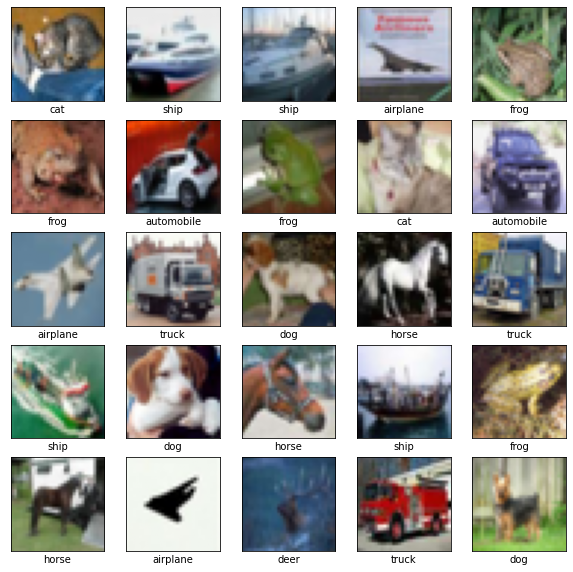

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [39]:
for i in range(25):
    print(np.argmax(results[i]), test_labels[i])

3 [3]
8 [8]
8 [8]
0 [0]
6 [6]
6 [6]
1 [1]
6 [6]
3 [3]
1 [1]
0 [0]
9 [9]
4 [5]
7 [7]
9 [9]
8 [8]
5 [5]
3 [7]
8 [8]
6 [6]
7 [7]
0 [0]
4 [4]
9 [9]
4 [5]


In [40]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']